In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\kartik pant\appdata\local\programs\python\python310\lib\site-packages (2.17.0)



You should consider upgrading via the 'C:\Users\Kartik Pant\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Kartik Pant\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

You should consider upgrading via the 'C:\Users\Kartik Pant\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Kartik Pant\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Importing Libraries

In [5]:
import cv2 
import os
import matplotlib.pyplot as plt 
import numpy as np 

# Reading and Displaying Image

In [6]:
img_array = cv2.imread("Dataset/Close_eyes/s0019_01624_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

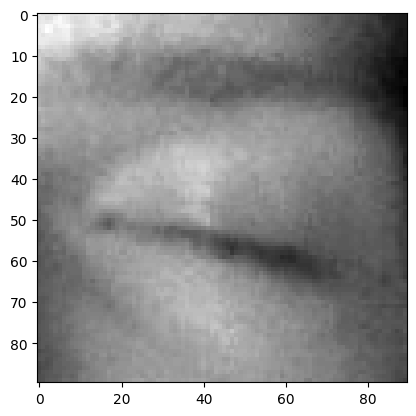

In [7]:
plt.imshow(img_array, cmap="gray") # To plot the Image

In [8]:
img_array.shape # To check the shape of the Image, 86x86 is very small, We have to make it 224x224 (Size used in ImageNet)

(90, 90)

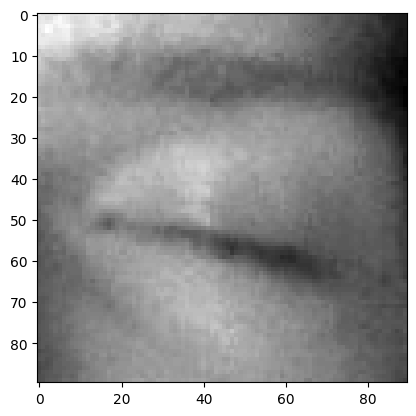

In [9]:
Datadirectory = "Dataset"  # Training Dataset
Classes = ["Close_eyes", "Open_eyes"] # List of Classes

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break          #Used to display only first image
    break 

# Resizing

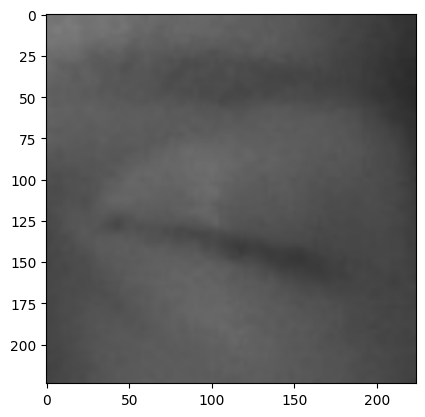

In [10]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# Reading all the images and converting them into an array for data and labels

In [11]:
# We're reading all images in the gray format because it was already gray. 
# RGB- Three Channels Red-Green-Blue, GrayScale- Single Channel


training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
        
           

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

3420


# Random shuffling to avoid overfitting

In [14]:
import random 
random.shuffle(training_Data)

In [15]:
# Appending data into these Lists.

X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) 
# Here 3 denotes, we've converted our images into RGB because ImageNet consists of RGB Images.

In [16]:
X.shape # 4000 images, 224x224 size, RGB-3

(3420, 224, 224, 3)

# Normalize the Data

In [17]:
X = X/255.0; # we're normalizing it

In [18]:
Y = np.array(y) # Converting Labels into Numpy Array

# Saving our Data

In [19]:
import pickle

# pickle_out = open("X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

# Now the file is stored, we can load it whenever we want!

In [20]:
# pickle_in = open("X.pickle", "rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle", "rb")
# y = pickle.load(pickle_in)


# Deep Learning Model for Training & Learning

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.mobilenet.MobileNet() # MobileNet is accurate as well as Lightweight.

In [23]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Transfer Learning

In [24]:
base_input = model.input # Input

In [25]:
base_output = model.layers[-4].output # Output of the dropout layer by ignoring last three layers.

In [26]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # One Node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

#Since it's a binary classification, we're using sigmoid activation function.

In [27]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [28]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Setting for Binary Classification (open/closed)

In [29]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1) # Training

97/97 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.9632 - loss: 0.0642 - val_accuracy: 0.3772 - val_loss: 20.0927


In [31]:
new_model.save('my_model.h5') # Saving my Model

In [32]:
new_model = tf.keras.models.load_model('my_model.h5')

# Checking the Network for Predictions

In [33]:
img_array = cv2.imread("s0019_03951_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [34]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [35]:
X_input.shape # 1 image, 224x224, RGB

(1, 224, 224, 3)

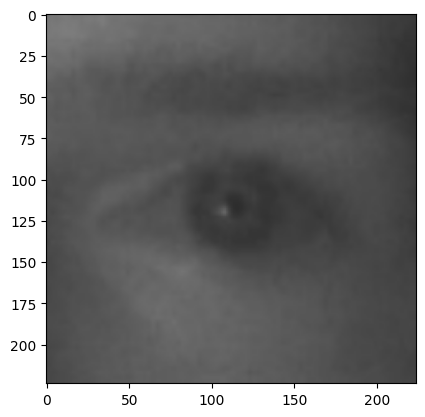

In [36]:
plt.imshow(new_array)

In [37]:
X_input = X_input/255.0

In [38]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


# For Open Eyes, values tends towards 1 and for Closed Eyes, values tends towards 0

In [39]:
prediction

array([[1.0159305e-14]], dtype=float32)

# Let's check on Unknown Images

In [40]:
img = cv2.imread('open.jpeg')

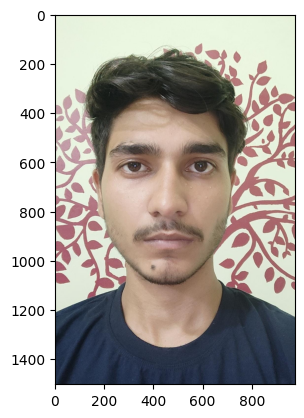

In [41]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Detecting Face and Eyes using Haarcascades

In [42]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

In [43]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [45]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [46]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

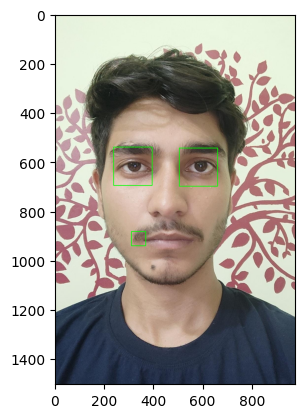

In [47]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping Eye Image

In [48]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w] # Region of Interest = ROI
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
#     if len(eyess) == 0:
#         print("Eyes not detected")
#     else:
    for ex, ey, ew, eh in eyess:
        eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

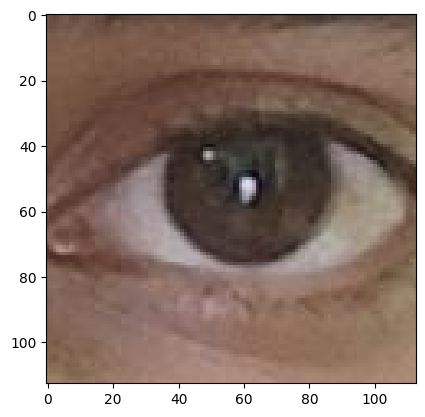

In [49]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [50]:
eyes_roi.shape

(113, 113, 3)

In [51]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
final_image = final_image/255.0

In [52]:
final_image.shape

(1, 224, 224, 3)

In [53]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[1.]], dtype=float32)

# Realtime Video Demo

In [54]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Kartik Pant\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [67]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0) 

#Check if webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
    final_image = final_image/255.0
    
    
    
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw rectangle around faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putText() method for
    #Inserting text on video
    
    cv2.putText(frame, 
                status, 
                (50, 50), 
                font, 3, 
                (0, 0, 255), 
                2, 
                cv2.LINE_4)
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    
    
    

Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
False
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
False
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
False
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
False
1/1 ━━━━━━

In [68]:
import winsound
frequency = 2500 # Set frequency to 2500 Hertz
duration = 100 # Set Duration to 1000 ms == 1 sec
import numpy as np
import cv2
path = "haarcascade_frontalface_alt.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(1)

#Check if webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
counter = 0    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw rectangle around faces
    for x,y,w,h in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
        
    # Use putText() method for inserting text on video
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0,255,0),
                   2,
                   cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #Add Text
        cv2.putText(frame, 'Active', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0,0,255),
                   2,
                   cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
            
        #Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add Text
            cv2.putText(frame, 'Sleep Alert !!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0
  
    cv2.imshow('Driverness Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [59]:
!python drowsiness_detection_demo.py

2025-06-23 21:59:49.823082: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 21:59:51.119409: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Traceback (most recent call last):
  File "C:\Users\Kartik Pant\Desktop\Mini Projct 4sem\drowsiness_detection_demo.py", line 7, in <module>
    model = load_model("your_model_path.h5")  # Change this to your actual model path
  File "C:\Users\Kartik Pant\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_api.py", line 189, in load_model
    return legacy_h5_format.load_model_fro

In [69]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import winsound

# Load your model
model = load_model("my_model.h5")  # Change this to your actual model path

# Haarcascades
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

cap = cv2.VideoCapture(0)
counter = 0
frequency = 2500
duration = 100  # milliseconds

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    status = "No Eyes"

    eyes_roi = None
    for (x, y, w, h) in eyes:
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        eyes_roi = roi_color
        break

    if eyes_roi is not None:
        try:
            final_image = cv2.resize(eyes_roi, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image / 255.0
            prediction = model.predict(final_image)[0][0]

            if prediction > 0.5:
                status = "Open Eyes"
                counter = 0
            else:
                counter += 1
                status = "Closed Eyes"

            if counter > 5:
                winsound.Beep(frequency, duration)
                cv2.putText(frame, "Sleep Alert !!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        except Exception as e:
            print("Error during prediction:", e)

    cv2.putText(frame, status, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 2)
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
